** The CNN network for happiness recognition**

We implement the recognition of emotion, which will be used for labeling videos.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# GPU
gpu_device = 0
torch.cuda.set_device(gpu_device)
print('Chosen GPU device: ' + str(torch.cuda.current_device()))

Chosen GPU device: 0


In [28]:
from make_dataloader import *
import pickle
load = False
batch_size = 75
try:
    if load:
        loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))
    else:
        make_dataloader(only_two = True, batch_size = batch_size)
        loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))
except (OSError, IOError) as e:
    make_dataloader(only_two = True, batch_size = batch_size)
    loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))

Data preprocessed and loaders saved in :
./fer2013/fer2013Loaders.p


In [3]:
train_loader = loaders['train_loader']
valid_loader = loaders['valid_loader']
test_loader = loaders['test_loader']

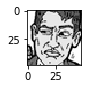

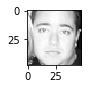

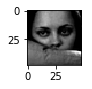

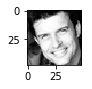

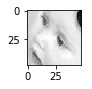

In [4]:
a = 0
for img,j in train_loader:
    plt.figure(figsize = (10,1))
    plt.imshow(img[0].numpy()[0], cmap="Greys_r")
    plt.show()
    a+=1
    if a >4:
        break

In [23]:
from emoCNN import *
import emoSolver
model = emoCNN.emoCNNnet(kernels = [12,6])
solver = emoSolver.emoSolver(optim_args={"lr": 0.01})

<bound method Module.parameters of emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU ()
    (2): Conv2d(12, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (3): ReLU ()
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d(12, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (6): ReLU ()
    (7): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (8): ReLU ()
    (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Linear (864 -> 100)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Linear (100 -> 2)
  )
)>


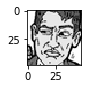

Variable containing:
 0.3079
 0.3959
[torch.cuda.FloatTensor of size 2 (GPU 0)]



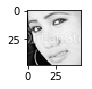

Variable containing:
 0.2643
-0.1808
[torch.cuda.FloatTensor of size 2 (GPU 0)]



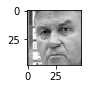

Variable containing:
-0.2179
 0.2302
[torch.cuda.FloatTensor of size 2 (GPU 0)]



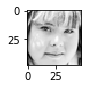

Variable containing:
1.00000e-02 *
  0.8675
 -9.6629
[torch.cuda.FloatTensor of size 2 (GPU 0)]



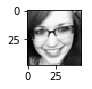

Variable containing:
-0.0437
 0.2672
[torch.cuda.FloatTensor of size 2 (GPU 0)]



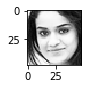

Variable containing:
-0.2615
 0.4433
[torch.cuda.FloatTensor of size 2 (GPU 0)]



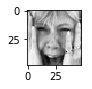

Variable containing:
-0.1311
 0.1396
[torch.cuda.FloatTensor of size 2 (GPU 0)]



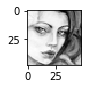

Variable containing:
 0.3636
-0.0391
[torch.cuda.FloatTensor of size 2 (GPU 0)]



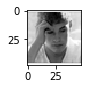

Variable containing:
 0.2307
-0.0778
[torch.cuda.FloatTensor of size 2 (GPU 0)]



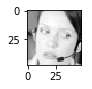

Variable containing:
 0.3344
 0.0511
[torch.cuda.FloatTensor of size 2 (GPU 0)]



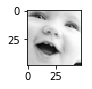

Variable containing:
 0.1750
 0.2040
[torch.cuda.FloatTensor of size 2 (GPU 0)]



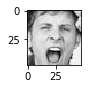

Variable containing:
 0.2240
 0.0747
[torch.cuda.FloatTensor of size 2 (GPU 0)]



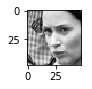

Variable containing:
-0.2319
 0.3245
[torch.cuda.FloatTensor of size 2 (GPU 0)]



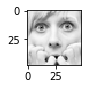

Variable containing:
 0.2206
-0.0514
[torch.cuda.FloatTensor of size 2 (GPU 0)]



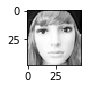

Variable containing:
-0.1590
 0.3901
[torch.cuda.FloatTensor of size 2 (GPU 0)]



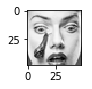

Variable containing:
 0.0952
 0.1488
[torch.cuda.FloatTensor of size 2 (GPU 0)]



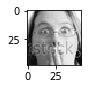

Variable containing:
1.00000e-02 *
  3.2241
  6.1650
[torch.cuda.FloatTensor of size 2 (GPU 0)]



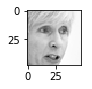

Variable containing:
 0.1055
-0.1252
[torch.cuda.FloatTensor of size 2 (GPU 0)]



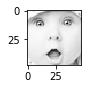

Variable containing:
1.00000e-02 *
  6.2697
  5.6783
[torch.cuda.FloatTensor of size 2 (GPU 0)]



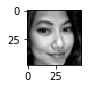

Variable containing:
 0.0047
 0.3928
[torch.cuda.FloatTensor of size 2 (GPU 0)]



In [24]:
a = 0
for img,j in train_loader:
    result = model(Variable(img).cuda(0))
    
    for i in range(20):
        plt.figure(figsize = (10,1))
        plt.imshow(img[i].numpy()[0], cmap="Greys_r")
        
        plt.show()    
        print(result[i])
    break

In [25]:
solver.train(model, train_loader, valid_loader, log_nth=100, num_epochs=20)

START TRAIN.
[iteration 0/940] TRAIN loss : 0.705470
[iteration 0/940] VALID acc/loss : 0.592000/0.669385
[Epoch 0/20] TRAIN acc/loss : 0.773333/0.553260
[Epoch 0/20] VALID acc/loss : 0.746667/0.531626
[Epoch 1/20] TRAIN acc/loss : 0.773333/0.536472
[Epoch 1/20] VALID acc/loss : 0.757333/0.511323
[iteration 100/940] TRAIN loss : 0.447011
[iteration 100/940] VALID acc/loss : 0.786667/0.454067
[Epoch 2/20] TRAIN acc/loss : 0.786667/0.489772
[Epoch 2/20] VALID acc/loss : 0.768000/0.481786
[Epoch 3/20] TRAIN acc/loss : 0.826667/0.447318
[Epoch 3/20] VALID acc/loss : 0.813333/0.439747
[iteration 200/940] TRAIN loss : 0.491016
[iteration 200/940] VALID acc/loss : 0.824000/0.389978
[Epoch 4/20] TRAIN acc/loss : 0.840000/0.419430
[Epoch 4/20] VALID acc/loss : 0.802667/0.426483
[Epoch 5/20] TRAIN acc/loss : 0.853333/0.364791
[Epoch 5/20] VALID acc/loss : 0.810667/0.391713
[iteration 300/940] TRAIN loss : 0.378884
[iteration 300/940] VALID acc/loss : 0.856000/0.348537
[Epoch 6/20] TRAIN acc/loss

[0.77333333333333332, 0.78666666666666663, 0.78666666666666663, 0.78666666666666663, 0.80000000000000004, 0.81333333333333335, 0.82666666666666666, 0.83999999999999997, 0.85333333333333339, 0.8666666666666667, 0.88, 0.85333333333333339, 0.88, 0.89333333333333331, 0.88, 0.83999999999999997, 0.88, 0.85333333333333339, 0.89333333333333331, 0.90666666666666662]


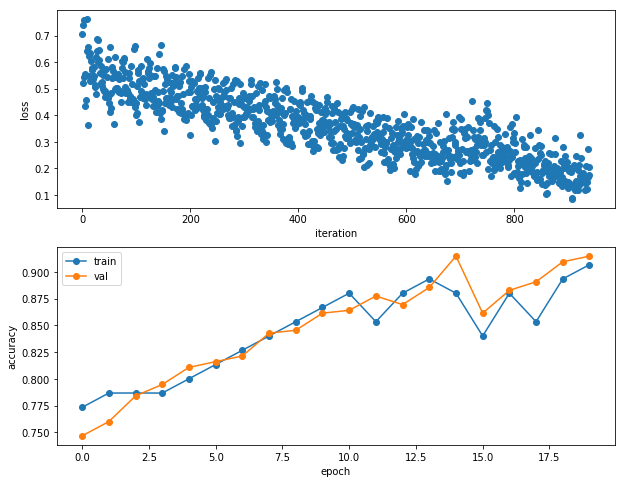

In [8]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
print(solver.train_acc_history)
plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [30]:
model.save('./emoCNNtrivial.p')

Saving model... ./emoCNNtrivial.p


In [9]:
#testing the final model
t_loss, t_acc = solver.get_valid_stats(model, test_loader)